In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import PredictMarketWithBayesTheorem as T

In [2]:
#files = os.listdir()
#for f in files:
#    print(f)

In [3]:
def categorize1(gain):

    if gain > 150.0:
        return 'HG'
    elif gain > 58.0:
        return 'MG'
    elif gain > 12.0:
        return 'LG'
    elif gain > 0.0:
        return 'S'
    elif gain > -33.0:
        return 'LL'
    elif gain > -79.:
        return 'ML'
    else:
        return 'HL'


In [4]:
#######################################################################################################
# build probabilities from input data
# predictions based on probabilities
######################################################################################################

states = ['HG', 'MG', 'LG', 'S', 'LL', 'ML', 'HL']

# read in data 
data_file = 'BitCoin_Daily_Close.csv'
# read in data file
input = pd.read_csv(data_file, parse_dates=True, index_col=0)

# convert to log scale and calculate daily change ( volatility )
input['LogClose'] = np.log(input['Close'])
#input['change'] = input['LogOpen'] - input['LogOpen'].shift(1)
#input = input.dropna(axis=0)
input['change'] = input['LogClose'].diff().dropna() * 1000


# group changes into buckets and label them
#input['change'] = (input['change'] - 1.) * 1000.
input['dx'] = input['change'].apply(categorize1)

data = input['dx']

# calculate probabilities of any movement on a given day
prob = T.probability_movement(data)

# calculate the probability of today's movement based on tomorrow's using historical data
prob_today_given_tomorrow = T.probability_today_given_tomorrow(data)
print(prob_today_given_tomorrow)

# now run forward
predictions = T.make_predictions(prob, prob, prob_today_given_tomorrow)



# print out predictions in a useful format
for s in states:

    p, t = T.get_predictions(s, predictions)
    
    print('-------------------------')
    print("if today's movement %s , then tomorrow's prediction "% s)
    for i in range(len(p)):
        
        print('Movement:  %s  %.4lf%%' % (p[i][0], p[i][1]/t * 100.))
        

Counts:  {'LL': 955, 'LG': 645, 'S': 522, 'ML': 212, 'MG': 201, 'HL': 129, 'HG': 51}
Probability: {'LL': 0.35174953959484345, 'LG': 0.23756906077348067, 'S': 0.19226519337016573, 'ML': 0.07808471454880295, 'MG': 0.07403314917127071, 'HL': 0.04751381215469613, 'HG': 0.01878453038674033}
Date
2010-07-18 00:00:00                                     HL
2010-07-19 00:00:00                                     HL
2010-07-20 00:00:00                                     HL
2010-07-21 00:00:00                                     MG
2010-07-22 00:00:00                                     HL
                                                        ..
2017-12-18 00:00:00                                     LL
2017-12-19 00:00:00                                     ML
2017-12-20 21:25:00                                     ML
This data was produced from the CoinDesk price page.    HL
http://www.coindesk.com/price/                          HL
Name: dx, Length: 2715, dtype: object
[('LL', 'LL', 0.14069

In [5]:
input.head()

,Close,LogClose,change,dx
Date,,,,
2010-07-18 00:00:00,0.09,-2.407946,NaN,HL
2010-07-19 00:00:00,0.08,-2.525729,-117.783036,HL
2010-07-20 00:00:00,0.07,-2.659260,-133.531393,HL
2010-07-21 00:00:00,0.08,-2.525729,133.531393,MG
2010-07-22 00:00:00,0.05,-2.995732,-470.003629,HL


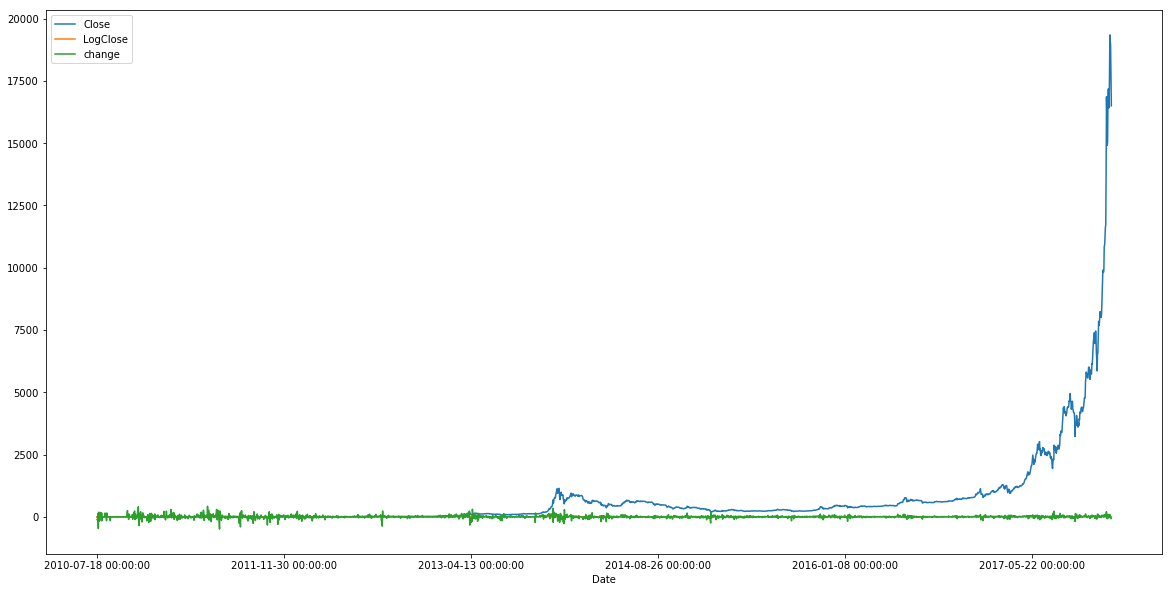

In [6]:
input.plot(figsize=[20,10])
plt.show()

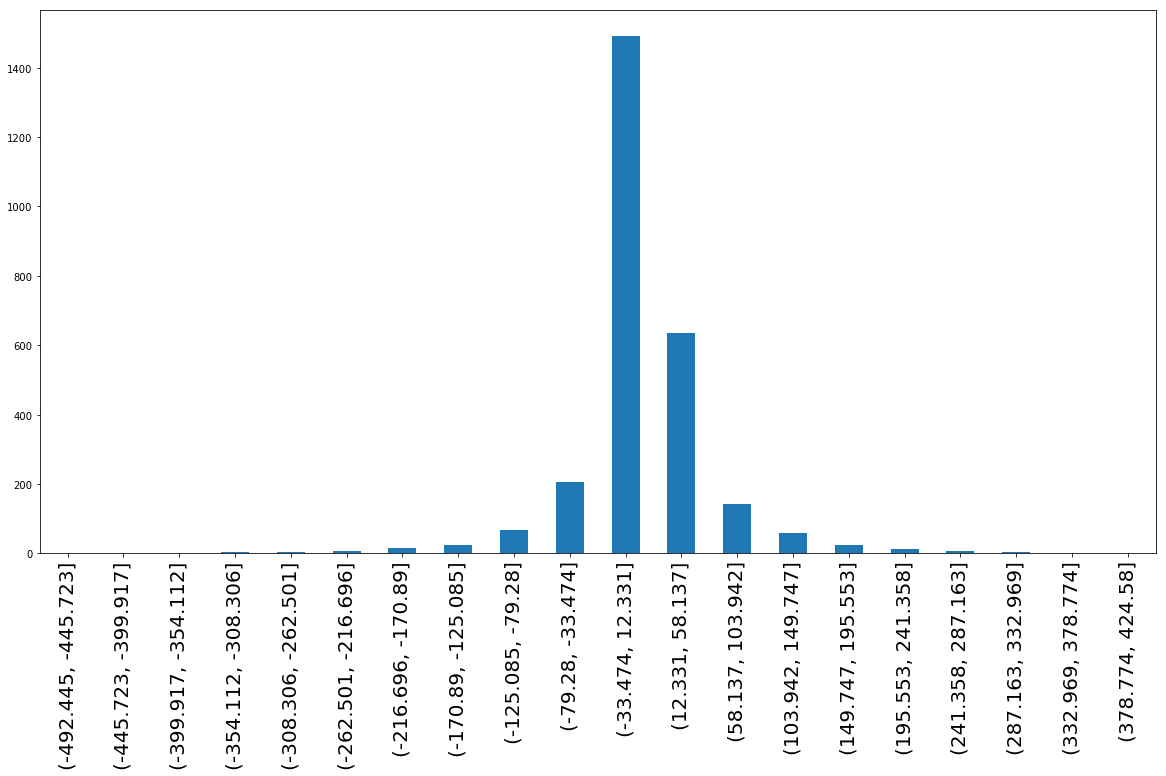

In [7]:
input['change'].value_counts(bins=20,sort=False).plot(figsize=[20,10], kind='bar')
ax = plt.subplot() # Defines ax variable by creating an empty plot

# Set the tick labels font
for label in ax.get_xticklabels():
    label.set_fontsize(20)